# Perceptron implementation

This code demonstrates basic implementation of a perceptron using NumPy and Pandas packages.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import *

#print(help(generate_data))
#print(help(get_weighted_sum))
#print(help(sigmoid))
#print(help(confusion_matrix))

In [10]:
n_features = 3
m_examples = 15
data = generate_data(m_examples, n_features, seed=29)
print('Features and labels matrix:\n---------------------------\n')
print(data, '\n\n---------------------------')
X = data.drop(columns=['targets']).values
Y = data['targets'].values
print(f'Number of features: {X.shape[1]}')
print(f'Number of training examples: {X.shape[0]}')

Features and labels matrix:
---------------------------

          x0        x1        x2  targets
0   0.050047  0.506322  0.519234        1
1   0.265203  0.129222  0.020731        1
2   0.393828  0.380229  0.023452        1
3   0.238212  0.788106  0.617595        1
4   0.982793  0.861112  0.631429        1
5   0.186492  0.841894  0.421253        1
6   0.028407  0.952240  0.943834        0
7   0.321769  0.493433  0.272774        0
8   0.760770  0.971630  0.608703        1
9   0.613694  0.231440  0.268094        0
10  0.381394  0.568859  0.732517        1
11  0.047114  0.561463  0.966119        0
12  0.218823  0.417570  0.043238        1
13  0.792898  0.160876  0.658430        1
14  0.236390  0.945161  0.873438        0 

---------------------------
Number of features: 3
Number of training examples: 15


In [11]:
seed_init=None
weights, bias = network_init(n_features, seed=seed_init)
print('Initial network parameters:')
for i in range(len(weights)):
    print(f'w{i} = {weights[i]}')
print(f'b = {bias}')

Initial network parameters:
w0 = 0.5187914642494222
w1 = 0.5348604851690558
w2 = 0.42029727498195657
b = 0


# Forward propagation

In this section, forward propagation through the perceptron is performed 

In [12]:
def forward_prop(X, weights, bias, threshold=0.5):
    weighted_sums = []
    sigmoids = []
    Y_hat = []
    for i in range(m_examples):
        example = X[i,:]
        weighted_sum = get_weighted_sum(example, weights, bias)
        weighted_sums.append(weighted_sum)
        sigm = sigmoid(weighted_sum)
        sigmoids.append(sigm)
        if sigm > threshold:
            y_hat = 1
        else:
            y_hat = 0
        Y_hat.append(y_hat)
    return Y_hat, weighted_sums, sigmoids

Y_hat, weighted_sums, sigmoids = forward_prop(X, weights, bias)
initial_pass = pd.DataFrame({'weighted_sum':weighted_sums, 'Y':Y, 'Y_hat':Y_hat, 'sigmoid':sigmoids,})
acc_init = (initial_pass['Y'] == initial_pass['Y_hat']).mean()
print(f'Initial forward propagation results (acc={acc_init:.2f}):\n---------------------------\n')
print(initial_pass)

Initial forward propagation results (acc=0.67):
---------------------------

    weighted_sum  Y  Y_hat   sigmoid
0       0.515008  1      1  0.625980
1       0.215414  1      1  0.553646
2       0.417541  1      1  0.602895
3       0.804683  1      1  0.690975
4       1.235827  1      1  0.774837
5       0.724098  1      1  0.673509
6       0.920744  0      1  0.715194
7       0.545495  0      1  0.633090
8       1.170204  1      1  0.763182
9       0.554847  0      1  0.635259
10      0.809999  1      1  0.692109
11      0.730804  0      1  0.674982
12      0.355038  1      1  0.587839
13      0.774132  1      1  0.684414
14      0.995270  0      1  0.730128


## Cross-entropy loss

In [13]:
def cross_entropy(Y, sigmoids):
    cost = []
    for i in range(len(Y)):
        y = Y[i]
        sigmoid = sigmoids[i]
        cross_entropy_loss = -(y*np.log10(sigmoid) + (1-y)*np.log10(1-sigmoid))
        cost.append(cross_entropy_loss)
    return cost
cross_entropy_cost = cross_entropy(Y, sigmoids)

initial_pass_with_cost = initial_pass.copy()
initial_pass_with_cost.drop(columns=['weighted_sum'], inplace=True)
initial_pass_with_cost['c-e loss'] = cross_entropy_cost
print(initial_pass_with_cost)

    Y  Y_hat   sigmoid  c-e loss
0   1      1  0.625980  0.203440
1   1      1  0.553646  0.256768
2   1      1  0.602895  0.219759
3   1      1  0.690975  0.160537
4   1      1  0.774837  0.110790
5   1      1  0.673509  0.171657
6   0      1  0.715194  0.545450
7   0      1  0.633090  0.435440
8   1      1  0.763182  0.117372
9   0      1  0.635259  0.438016
10  1      1  0.692109  0.159825
11  0      1  0.674982  0.488092
12  1      1  0.587839  0.230742
13  1      1  0.684414  0.164681
14  0      1  0.730128  0.568842


## Network training

This training algorithm updates weights and bias after each pass through the training data. It means, that after each training example, weights and bias are updated.

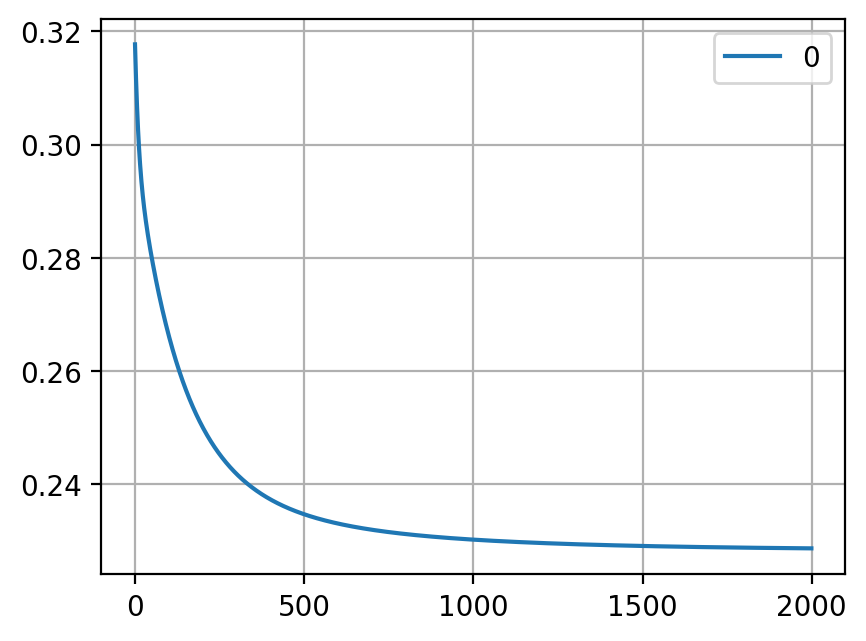

In [14]:
learning_rate = 0.1
epochs = 2000

def cross_entropy_loss(y, y_hat):
    return -(y*np.log10(y_hat) + (1-y)*np.log10(1-y_hat))

def update_weights(weights, alpha, target, prediction, feature):
    return [w + alpha*(target-prediction)*x for x, w in zip(feature, weights)]

def update_bias(bias, alpha, y, y_hat):
    return bias + alpha*(y-y_hat)
        
def train_model(X, Y, alpha=0.01, n_epoch=100):
    W, b = network_init(n_features, seed=seed_init)
    epoch_cost = []
    for e in range(n_epoch):
        m = X.shape[0]
        individual_loss = []
        for i in range(m):
            x = X[i]
            y = Y[i]
            w_sum = get_weighted_sum(x, W, b)
            y_hat = sigmoid(w_sum)
            loss = cross_entropy_loss(y, y_hat)
            individual_loss.append(loss)
            # gradient descent
            W = update_weights(W, alpha, y, y_hat, x)
            b = update_bias(b, alpha, Y[i], y_hat)
        average_cost = sum(individual_loss)/len(individual_loss)
        epoch_cost.append(average_cost)
    return W, b, epoch_cost
        
final_weights, final_bias, epoch_cost = train_model(X, Y, n_epoch=epochs)

training_data = pd.DataFrame(epoch_cost)
training_data_plot = training_data.plot(kind="line", grid=True)
training_data_plot;

In [15]:
Y_hat_final, weighted_sums_final, _ = forward_prop(X, final_weights, final_bias)
final_pass = pd.DataFrame({'weighted_sum':weighted_sums_final, 'Y':Y, 'Y_hat':Y_hat_final})
acc_final = (final_pass['Y'] == final_pass['Y_hat']).mean()
print(f'Final forward propagation results (acc={acc_final:.2f}):\n---------------------------\n')
print(final_pass)

Final forward propagation results (acc=0.80):
---------------------------

    weighted_sum  Y  Y_hat
0      -0.030495  1      0
1       1.526575  1      1
2       2.082772  1      1
3       0.413359  1      1
4       2.157136  1      1
5       0.931142  1      1
6      -0.852488  0      0
7       1.304530  0      1
8       1.834000  1      1
9       1.705973  0      1
10      0.167439  1      1
11     -1.294822  0      0
12      1.663547  1      1
13      0.890673  1      1
14     -0.176078  0      0


In [16]:
print(confusion_matrix(Y, Y_hat_final))

[[9. 1.]
 [2. 3.]]
